## Price Elasticity

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
df = pd.read_excel("Case Study Data.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [156]:
df.Category

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object

In [157]:
#Choose one merchant platform
df = df[df['Category']=='Technology']
#Choose condition as New

#Check values in different category_name
category = df['Sub-Category'].value_counts()
print("Technology Category Percentage\n{}\n{}\n Technology Category values count\n{}\n{}".format(
      50*"-", (category / len(df.index))[:5] * 100, 50*"-", category[:5]))
      

Technology Category Percentage
--------------------------------------------------
Phones         48.132106
Accessories    41.959935
Machines        6.226313
Copiers         3.681646
Name: Sub-Category, dtype: float64
 Technology Category values count
--------------------------------------------------
Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64


In [158]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [159]:
new = df.groupby(['Sub-Category', 'Product Name', 'Sales'])['Sales'].sum().sort_values(ascending=False).to_frame()
new.head(20)

Sales
Sub-Category Product Name                                       Sales               
Machines     Cisco TelePresence System EX90 Videoconferencin... 22638.480  22638.480
Copiers      Canon imageCLASS 2200 Advanced Copier              17499.950  17499.950
                                                                13999.960  13999.960
                                                                11199.968  11199.968
                                                                10499.970  10499.970
Machines     3D Systems Cube Printer, 2nd Generation, Magenta   9099.930    9099.930
             HP Designjet T520 Inkjet Large Format Printer -... 8749.950    8749.950
Copiers      Canon imageCLASS 2200 Advanced Copier              8399.976    8399.976
Machines     Lexmark MX611dhe Monochrome Laser Printer          8159.952    8159.952
             Cubify CubeX 3D Printer Triple Head Print          7999.980    7999.980
             HP Designjet T520 Inkjet Large Format Printer -... 6999.960    6999.960
             Lexmark MX611dhe Monochrome Laser Printer          3059.982    6119.964
Copiers      Canon PC1060 Personal Laser Copier                 2799.960    5599.920
             Hewlett Packard LaserJet 3310 Copier               5399.910    5399.910
Machines     3D Systems Cube Printer, 2nd Generation, Magenta   5199.960    5199.960
Copiers      Canon PC1060 Personal Laser Copier                 4899.930    4899.930
Machines     Ativa V4110MDD Micro-Cut Shredder                  4899.930    4899.930
             Cubify CubeX 3D Printer Double Head Print          4799.984    4799.984
             Zebra ZM400 Thermal Label Printer                  4643.800    4643.800
Phones       Apple iPhone 5                                     4548.810    4548.810

In [160]:
Product = df['Product Name'].value_counts()
Product.head(20)

Logitech 910-002974 M325 Wireless Mouse for Web Scrolling                                                        15
Kingston Digital DataTraveler 16GB USB 2.0                                                                       13
Logitech Desktop MK120 Mouse and keyboard Combo                                                                  12
Maxell 4.7GB DVD-R                                                                                               11
Geemarc AmpliPOWER60                                                                                             11
SanDisk Ultra 32 GB MicroSDHC Class 10 Memory Card                                                               11
Microsoft Sculpt Comfort Mouse                                                                                   10
Wilson Electronics DB Pro Signal Booster                                                                         10
I Need's 3d Hello Kitty Hybrid Silicone Case Cover for HTC One X 4g with

In [161]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [162]:
df['Price']= df['Sales']/df['Quantity']

In [163]:
df_tech = df[df['Sub-Category']=='Machines']

#Make sure to not have any duplicates in the data
df_tech = df_tech.groupby(['Order Date','Product Name']).agg({'Price':'mean','Quantity': 'sum' }).reset_index()

#laptop data used for price elasticities
df_tech.head()

,Order Date,Product Name,Price,Quantity
0,2014-03-14,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,287.455,2
1,2014-03-18,Cisco TelePresence System EX90 Videoconferenci...,3773.080,6
2,2014-03-18,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,205.325,4
3,2014-03-18,Swingline SM12-08 MicroCut Jam Free Shredder,319.992,4
4,2014-04-18,Ativa MDM8000 8-Sheet Micro-Cut Shredder,71.992,4


In [173]:
df_tech

,Order Date,Product Name,Price,Quantity
0,2014-03-14,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,287.455,2
1,2014-03-18,Cisco TelePresence System EX90 Videoconferenci...,3773.080,6
2,2014-03-18,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,205.325,4
3,2014-03-18,Swingline SM12-08 MicroCut Jam Free Shredder,319.992,4
4,2014-04-18,Ativa MDM8000 8-Sheet Micro-Cut Shredder,71.992,4
...,...,...,...,...
110,2017-11-16,Hewlett-Packard 300S Scientific Calculator,13.110,4
111,2017-11-21,"3D Systems Cube Printer, 2nd Generation, White",1039.992,1
112,2017-12-04,Okidata C610n Printer,324.500,2
113,2017-12-24,DYMO CardScan Personal V9 Business Card Scanner,159.990,3


In [164]:
#Format and build a dataframe with x_values for each product within the caregory
x_pivot = df_tech.pivot(index= 'Order Date' ,columns='Product Name' ,values='Price')
x_values = pd.DataFrame(x_pivot.to_records())
x_values.fillna(method='ffill', inplace=True)
x_values[:2]

,Order Date,"3D Systems Cube Printer, 2nd Generation, Magenta","3D Systems Cube Printer, 2nd Generation, White",Ativa MDM8000 8-Sheet Micro-Cut Shredder,Ativa V4110MDD Micro-Cut Shredder,Bady BDG101FRU Card Printer,"Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner","Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner",Canon PC170 Desktop Personal Copier,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,...,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,Swingline SM12-08 MicroCut Jam Free Shredder,Texas Instrument TI-15 Fraction Calculator,Texas Instruments TI-34 Scientific Calculator,"Vtech AT&T CL2940 Corded Speakerphone, Black",Wasp CCD Handheld Bar Code Reader,Xerox WorkCentre 6505DN Laser Multifunction Printer,Zebra GK420t Direct Thermal/Thermal Transfer Printer,Zebra GX420t Direct Thermal/Thermal Transfer Printer,Zebra ZM400 Thermal Label Printer
0,2014-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,319.992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
#Format and build a dataframe with y_values for each product within the caregory
y_pivot = df_tech.pivot(index= 'Order Date' ,columns='Product Name' ,values='Quantity')
y_values = pd.DataFrame(y_pivot.to_records())
y_values.fillna(method='ffill', inplace=True)

In [166]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "slope": [],
    "coefficient_pvalue" : [],
    "rsquared": [],
}

for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    
    #Linear Regression Model
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:
        
        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        
        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)
        
        #Append results into dictionary for dataframe
        results_values["name"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        results_values["rsquared"].append(rsquared)
        
final_df = pd.DataFrame.from_dict(results_values)


C:\Users\danie\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [167]:
df_elasticity = final_df[['name','price_elasticity','coefficient_pvalue','slope','price_mean','quantity_mean','intercept',
                         'coefficient_pvalue', 'rsquared']]

In [168]:
print("Null Hypothesis Rejected:", len(df_elasticity), "out of", len(set(df_furnishing['Product Name'])) )

Null Hypothesis Rejected: 21 out of 0


In [169]:
df_elasticity.head()

,name,price_elasticity,coefficient_pvalue,slope,price_mean,quantity_mean,intercept,coefficient_pvalue,rsquared
0,"3D Systems Cube Printer, 2nd Generation, White",-0.872760,0.000000e+00,-0.002564,666.415926,1.957895,3.666667,0.000000e+00,1.00000
1,Ativa MDM8000 8-Sheet Micro-Cut Shredder,2.295238,0.000000e+00,0.166685,85.049373,6.176471,-8.000000,0.000000e+00,1.00000
2,Bady BDG101FRU Card Printer,1.378207,7.397199e-29,0.007794,688.184169,3.891566,-1.471819,7.397199e-29,0.78612
3,Cisco 9971 IP Video Phone Charcoal,-0.370861,0.000000e+00,-0.006494,410.666667,7.190476,9.857143,0.000000e+00,1.00000
4,Cubify CubeX 3D Printer Double Head Print,-0.288110,7.997982e-03,-0.000488,1453.841308,2.461538,3.170732,7.997982e-03,0.10643


In [170]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\danie\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


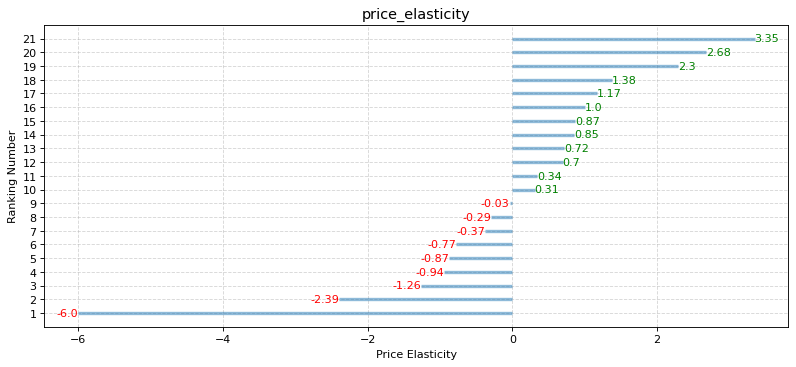

,name,price_elasticity
ranking,,
21,Zebra GX420t Direct Thermal/Thermal Transfer P...,3.350120
20,Fellowes Powershred HS-440 4-Sheet High Securi...,2.679426
19,Ativa MDM8000 8-Sheet Micro-Cut Shredder,2.295238
18,Bady BDG101FRU Card Printer,1.378207
17,Okidata C610n Printer,1.170833
16,Lexmark 20R1285 X6650 Wireless All-in-One Printer,1.000000
15,DYMO CardScan Personal V9 Business Card Scanner,0.869029
14,Okidata C331dn Printer,0.849737
13,HP Designjet T520 Inkjet Large Format Printer ...,0.720349


In [171]:
pe_plot = divergent_plot(df_elasticity, 'price_elasticity', 'Ranking Number', 'Price Elasticity')

In [172]:
final_df

,name,price_elasticity,price_mean,quantity_mean,intercept,slope,coefficient_pvalue,rsquared
0,"3D Systems Cube Printer, 2nd Generation, White",-0.872760,666.415926,1.957895,3.666667e+00,-0.002564,0.000000e+00,1.000000
1,Ativa MDM8000 8-Sheet Micro-Cut Shredder,2.295238,85.049373,6.176471,-8.000000e+00,0.166685,0.000000e+00,1.000000
2,Bady BDG101FRU Card Printer,1.378207,688.184169,3.891566,-1.471819e+00,0.007794,7.397199e-29,0.786120
3,Cisco 9971 IP Video Phone Charcoal,-0.370861,410.666667,7.190476,9.857143e+00,-0.006494,0.000000e+00,1.000000
4,Cubify CubeX 3D Printer Double Head Print,-0.288110,1453.841308,2.461538,3.170732e+00,-0.000488,7.997982e-03,0.106430
5,DYMO CardScan Personal V9 Business Card Scanner,0.869029,124.039306,5.694118,7.457658e-01,0.039893,3.145371e-17,0.578215
6,Epson TM-T88V Direct Thermal Printer - Monochr...,-2.389937,180.858673,3.244898,1.100000e+01,-0.042879,0.000000e+00,1.000000
7,Fellowes Powershred HS-440 4-Sheet High Securi...,2.679426,139.093590,4.230769,-7.105263e+00,0.081499,6.198182e-05,0.191388
8,HP Designjet T520 Inkjet Large Format Printer ...,0.720349,1701.913352,4.615385,1.290698e+00,0.001953,9.362796e-13,0.437748
9,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,-1.260870,206.114712,3.980769,9.000000e+00,-0.024352,0.000000e+00,1.000000
